# LSN 9

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

# Exercise 9.1

## Assigment

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

## Data structure

First of all I want to create the proper data structure encapsulating the description of my individuals.

eliminare la ridondanza del percorso partgendo sempre dalla stessa città, tutti gli individui del mio algoritmo li faccio partire dalla stessa città. Per la ridondanza CW ACW non basta ma dopo vediamo una situa per risolverla

La cosa più importante da programmare è un operatore di check che cintrolli che tutti gli individui siano conformi ai vincoli del problema: parto da una stessa città, visito una città una sola volta, visito tutte le città, finisco nella città di partenza. I bachi saltano fuori e spesso si rischia di uscire dai vincoli e il rischio è che non me ne accorgo e faccio casino.

In [ ]:
un buon algoritmo genetico doverebbe funzionare bene con anche semi diversi

In [224]:
import numpy as np
import matplotlib.pyplot as plt

In [477]:
path = np.loadtxt('./9.1/bestPath.txt', usecols=(0, 1))

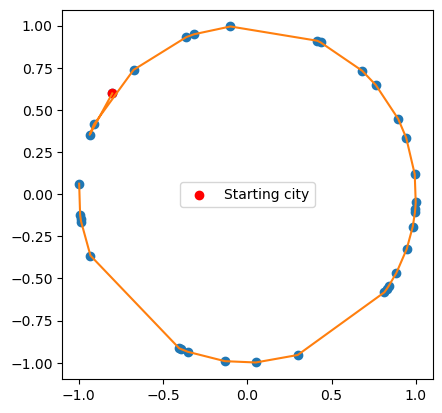

In [478]:
cities = np.loadtxt('./9.1/CitiesCircle.txt', usecols=(0, 1))
path = np.loadtxt('./9.1/bestPath.txt', usecols=(0, 1))
plt.scatter(cities[:,0], cities[:,1])
plt.scatter(cities[0,0],cities[0,1], c='red', label='Starting city')
plt.plot(path[:,0],path[:,1], color='tab:orange')
plt.legend()
plt.gca().set_aspect('equal')
plt.show()

In [518]:
path[path[:,0]==100]

array([[1.000e+02, 1.226e-01, 1.699e-01],
       [1.000e+02, 1.338e-01, 5.350e-02],
       [1.000e+02, 8.400e-02, 1.593e-01],
       [1.000e+02, 2.332e-01, 1.933e-01],
       [1.000e+02, 5.019e-01, 2.430e-02],
       [1.000e+02, 6.784e-01, 9.820e-02],
       [1.000e+02, 8.133e-01, 1.790e-02],
       [1.000e+02, 7.760e-01, 2.110e-02],
       [1.000e+02, 7.050e-01, 8.600e-02],
       [1.000e+02, 6.520e-01, 2.139e-01],
       [1.000e+02, 6.860e-01, 3.694e-01],
       [1.000e+02, 6.168e-01, 5.805e-01],
       [1.000e+02, 4.718e-01, 5.849e-01],
       [1.000e+02, 2.792e-01, 5.459e-01],
       [1.000e+02, 1.730e-02, 5.832e-01],
       [1.000e+02, 6.460e-02, 7.547e-01],
       [1.000e+02, 1.210e-01, 6.801e-01],
       [1.000e+02, 5.280e-02, 4.535e-01],
       [1.000e+02, 1.683e-01, 5.724e-01],
       [1.000e+02, 4.932e-01, 7.560e-01],
       [1.000e+02, 6.560e-01, 9.055e-01],
       [1.000e+02, 7.658e-01, 9.703e-01],
       [1.000e+02, 9.189e-01, 9.399e-01],
       [1.000e+02, 9.319e-01, 7.54

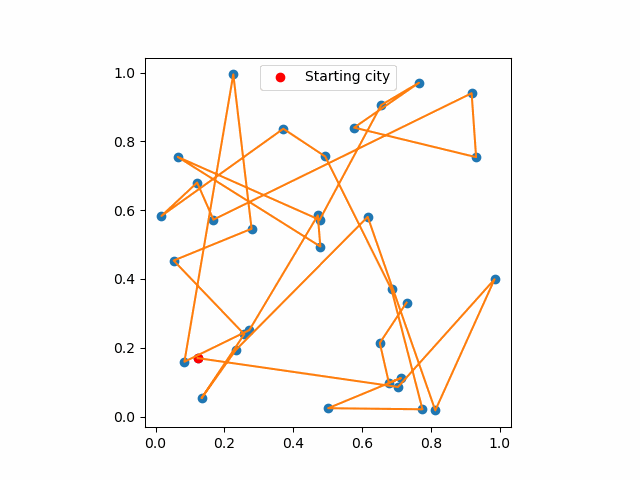

In [522]:
import numpy as np
import io
from PIL import Image
from IPython.display import Image as IPImage
from IPython.display import display

cities = np.loadtxt('./9.1/CitiesSquare.txt', usecols=(0, 1))
path = np.loadtxt('./9.1/paths.txt', usecols=(0, 1, 2))

frames = []  # List to store individual frames

for i in range(0, 976, 25):
    # Extract the frame from the data
    frame = path[path[:, 0] == i]
    plt.plot(frame[:, 1], frame[:, 2], color='tab:orange')
    plt.scatter(cities[:, 0], cities[:, 1])
    plt.scatter(cities[0, 0], cities[0, 1], c='red', label='Starting city')
    plt.xlabel('')
    plt.legend()
    plt.gca().set_aspect('equal')

    # Convert the plot to PIL Image object
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    frames.append(img)
    plt.close()

# Save the frames as a GIF
animation_path = "animation.gif"
frames[0].save(animation_path, save_all=True, append_images=frames[1:], optimize=False, duration=200, loop=0)

# Display the GIF animation
display(IPImage(animation_path))

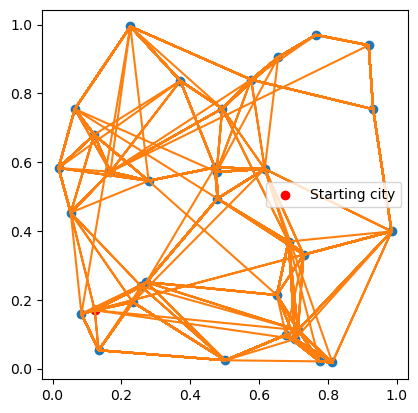

In [505]:
cities = np.loadtxt('./9.1/CitiesSquare.txt', usecols=(0, 1))
path = np.loadtxt('./9.1/paths.txt', usecols=(0, 1, 2))
lastPath=path[path[:,0]==100]
plt.plot(path[:,1],path[:,2], color='tab:orange')
plt.scatter(cities[:,0], cities[:,1])
plt.scatter(cities[0,0],cities[0,1], c='red', label='Starting city')
plt.legend()
plt.gca().set_aspect('equal')
plt.show()

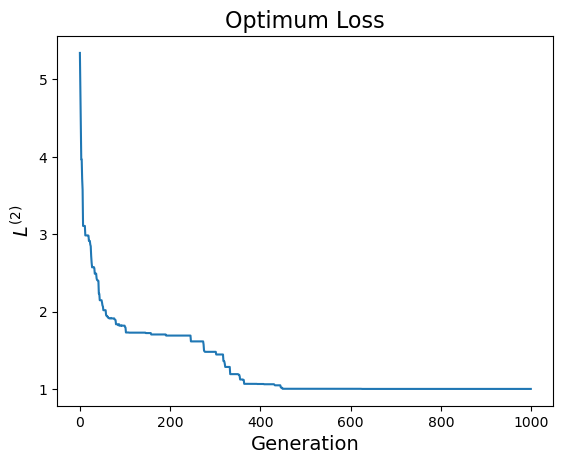

In [497]:
optimumLoss = np.loadtxt('./9.1/optimumLoss.txt', usecols=(0,1))
plt.plot(optimumLoss[:,0], optimumLoss[:,1])
plt.title('Optimum Loss', fontsize=16)
plt.ylabel('$L^{(2)}$', fontsize=14)
plt.xlabel('Generation',fontsize=14)
plt.show()

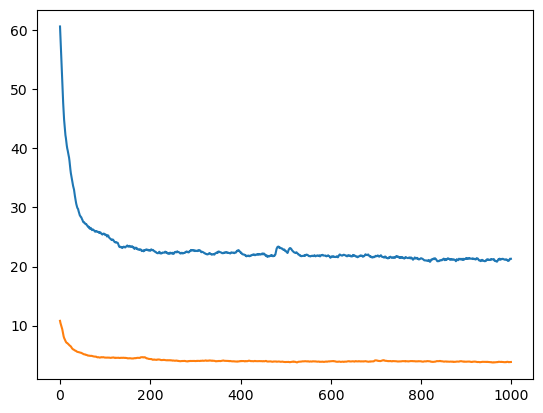

In [484]:
loss = np.loadtxt('./9.1/resultsCircle.txt', usecols=(0))
plt.plot(loss)
loss = np.loadtxt('./9.1/resultsSquare.txt', usecols=(0))
plt.plot(loss)

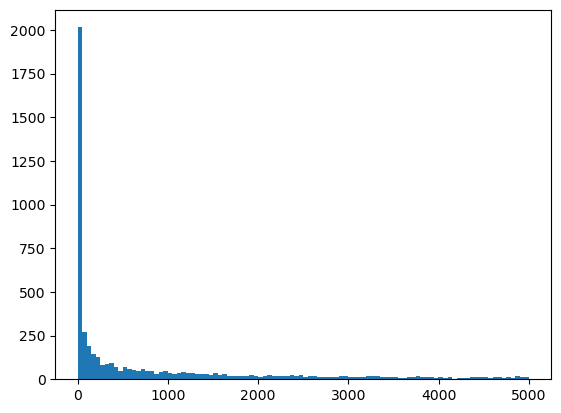

In [407]:
p=5
indexis=[]

for h in range(0,5000):

    indexis.append(int(5000*(np.random.uniform()**p))+1)
plt.hist(indexis, bins=100)
plt.show()

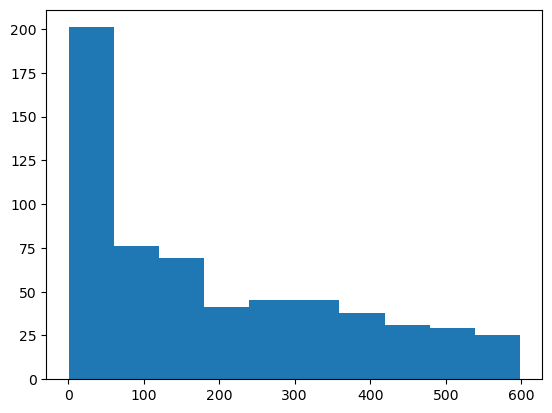

In [263]:
min(indexis)

1